# 1 - Simulating a frequency sweep using the full order solver

This tutorial illustrates how we can run a simple simulation using the default settings used by MPT-Calculator.

First, we need to navigate to the project root directory. To check use:

In [9]:
import os
os.getcwd()

'/home/james/Desktop/Updated_MPT_Calculator/MPT-Calculator'

and to set the appropriate home directory:

In [10]:
root_dir = os.path.dirname(os.getcwd())
os.chdir(root_dir)
os.getcwd()

'/home/james/Desktop/Updated_MPT_Calculator'

The MPT-Calculator assumes that the current working directory is the root MPT-Calculator project folder and will not work otherwise.

We now need to import the main function. $\texttt{main.py}$ contains the starting point for MPT-Calculator. 

In [3]:
from main import main
from time import time

importing NGSolve-6.2.2203


$\texttt{main}$ is a function taking variable input arguments for controlling the mesh size, order, geometry model, exciting frequencies, and alpha:
```python
main(h=2, order=2, curve_degree=5, start_stop=(), alpha='', geometry='default', frequency_array='default', 
     use_OCC=False, use_POD=False, use_parallel=True)
```
These will be explained in detail later. For now, lets run the default settings:

| | |
|---------------------------------------------|---|
|$\texttt{Geometry} = \texttt{'sphere.geo'}$  |$\texttt{Start = 1}$       |
|$\texttt{alpha = 1e-3}$                      |$\texttt{Finish = 8}$      |   
|$\texttt{h = 'coarse'}$                             |$\texttt{Points = 40}$     |
|$\texttt{Order = 2}$                         |$\texttt{Single = False}$  |
|$\texttt{Pod = False}$   |$\texttt{MultiProcessing = True}$    |
|$\texttt{use_OCC = False}$ | |

sphere.geo
generating mesh
 mesh contains 7592 elements
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
 solved theta0 problems    
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
Frequency Sweep complete 


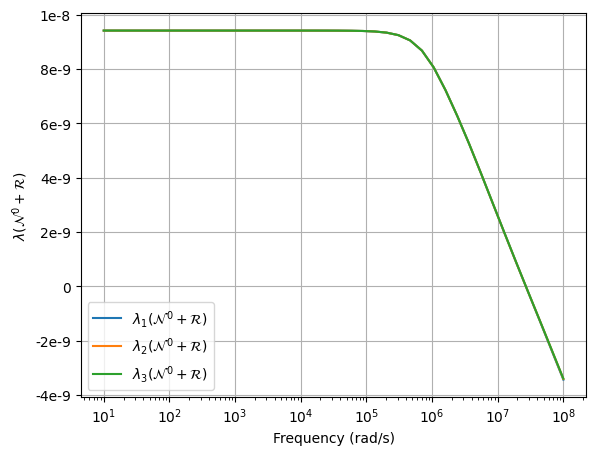

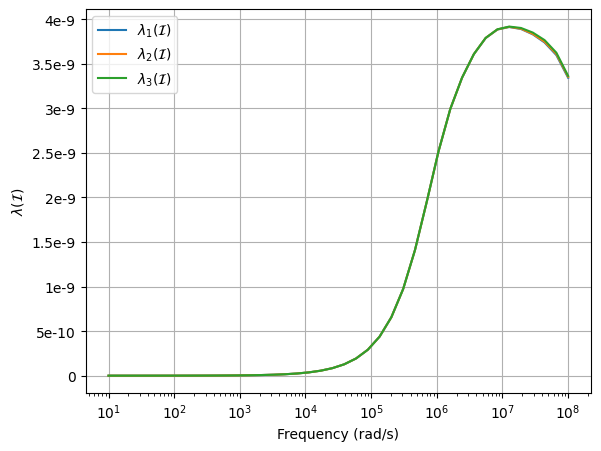

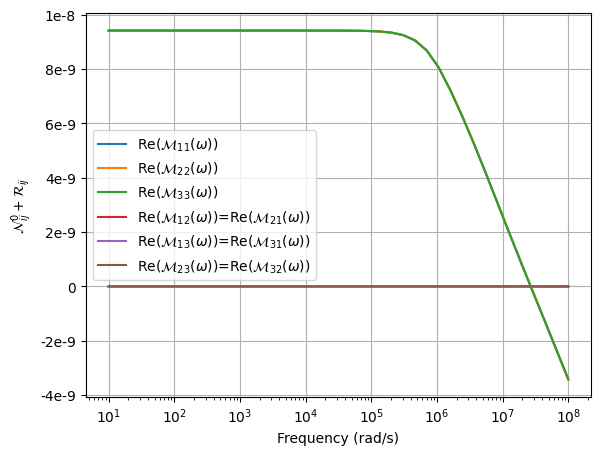

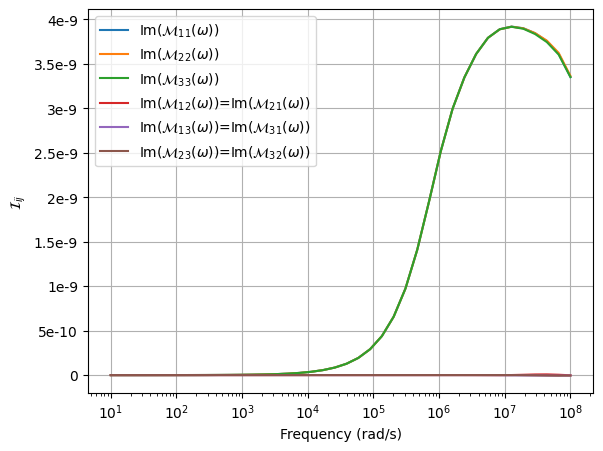

In [4]:
start_time = time();
main();
stop_time = time();

In [5]:
print(f'Total time = {(stop_time - start_time)/60} minutes')

Total time = 1.025926689306895 minutes


We have just ran a simulation using the default values of MPT-Calculator. 

This computes the MPT characterisation of a conducting sphere with $\sigma = 1\times 10^6$ S/m, and radius $\alpha=0.001$ m by constructing a coarse unstructured tetrahedral discretisation of a unit sphere set in truncated unbounded region in the form of a larger sphere of radius 100 units using order 2 elements. Note the physical object is obtained by scaling the non-dimensional computational domain by $\alpha$.

The simulation computes the MPT spectral signature for $10^1 \le \omega \le 10^8$ rad/s at 40 logarithmically spaced samples.

We can visualie the mesh that we used for this simulation via either loading it into the netgen gui, or by visualising it using Jupyter support offered by NGSolve.

## Important: 
While the default values provide a reasonable characterisation of the conducting sphere in a short computation time they should not be relied on to be fixed for all problems! In general, the simulation settings must be tuned for each different problem.

<b>MPT-Calculator is based on a finite element solver and, as with all finite element solutions, it is important that we check that our numerical solutions are converged. We investigate this further in the next tutorial</b>.

## Saving Results

The output of the simulation, including any figures are saved in the 'Results' folder.

For example: 
```bash
MPT-Calculator/Results/sphere/al_0.001_mu_10_sig_1e6/1e1-1e8_40_el_9814_ord_2/
```
The results folder will contain a copy of the input files used for the simulation, including the mesh, .geo file, and a copy of the main function. This is so that the results can be recreated. The naming of the subfolders reflects

The sphere problem that has been solved
The object size and materials ($\alpha=0.001$ m, $\mu_r=10$, $\sigma = 1\times 10^6$ S/m,) by al_0.001_mu_10_sig_1e6
The frequency range, number of samples, number of elements and element order ($10^1 \le \omega \le 10^8$ rad/s , 40 samples, 3 839 elements, $p=2$ ) by 1e1-1e8_40_el_3839_ord_2

In this folder, we save a copy of each figure produced, a copy of the input files (geo file, mesh file, settings and the main function), a copy of the plotting functions, and a copy of the raw output data.

The output data is organised as a series of .csv files:
- $\texttt{Tensors.csv}$ - A complex Nx9 array containing each of the tensor coefficients for the 3x3 rank 2 MPT for each frequency of interest. This is stored as (row 1, row 2, row 3).
- $\texttt{EigenValues.csv}$ - A complex Nx3 array containing each of the eigenvalues for each frequency. Note that the real and imaginary parts are obtained from decompositions of $\tilde{\mathcal{R}}$ and $\mathcal{I}$ respectivly and are sorted independently in assending order.
- $\texttt{N0.csv}$ - A real 3x3 array storing the components of the $\mathcal{N}^0$ tensor.
- $\texttt{Frequencies.csv}$ A Nx1 array storing the evaluation frequencies [rad/s].

If applicable, POD output is also saved in the similarly names POD files. These files contain the equivalent output from each of the $n$ snapshot frequencies used in by the POD mode of MPT-Calculator.

Finally, plotting files, PlotEditor.py, PlotterSettings.py, and PODPlotEditor.py are also saved. Running PlotEditor.py will reproduce the figures output from $MPT-Calculator and allows the user to make changes to the format and presentation of the figures.

## Returning Values

Unlike the original MPT-Calculator, the new version allows the user to return variables from main.

```python
Return_Dict = main()
```
These are stored in a dictionary where each key corresponds to a specific output.

 - $\texttt{TensorArray}$ is a complex Nx9 array containing each of the tensor coefficients for the 3x3 rank 2 MPT for each frequency of interest. This is stored as (row 1, row 2, row 3) 
 - $\texttt{EigenValues}$ is a Nx3 array containing the eigenvalues for each frequency.
 - $\texttt{N0}$ is the 3x3 $\mathcal{N}^0$ coefficients.
 - $\texttt{NElements}$ is the integer number of elements in the mesh.
 - $\texttt{FrequencyArray}$ is the Nx1 array containing the frequencies used for the sweep.
 - $\texttt{NDOF}$ is a tuple containing the number of degrees of freedom used for the $\boldsymbol{\theta}^{(0)}$ and $\boldsymbol{\theta}^{(1)}$ finite element spaces.

In additon optional return arguments are added to the dictionary depending on the settings used.
 
 - $\texttt{EddyCurrentTest}$ will contain an estimated max frequency where the eddy current model holds if $\texttt{EddyCurentTest}$ is set to True in $\texttt{Settings.py}$.
 
If the $\texttt{use_POD}$ option is used then additional outputs corresponding to the POD snapshot solutions are also returned. This will be discussed in more detail in Tutorial [4](./4_POD_solve_example.ipynb)

This is to make it easier to integrate the $\texttt{MPT-Calculator}$ into other codebases.

sphere.geo
generating mesh
 mesh contains 7592 elements
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
 solved theta0 problems    
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
Frequency Sweep complete 


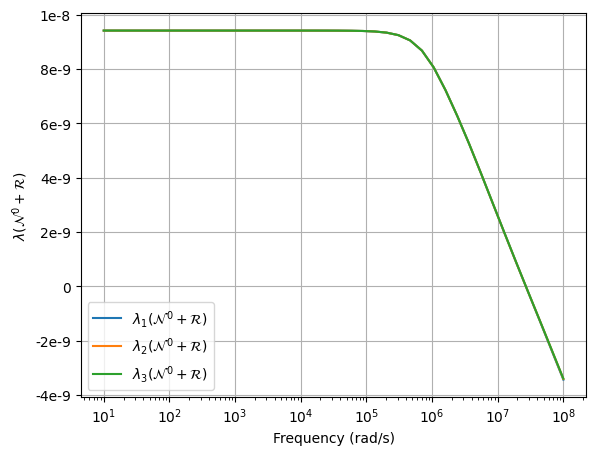

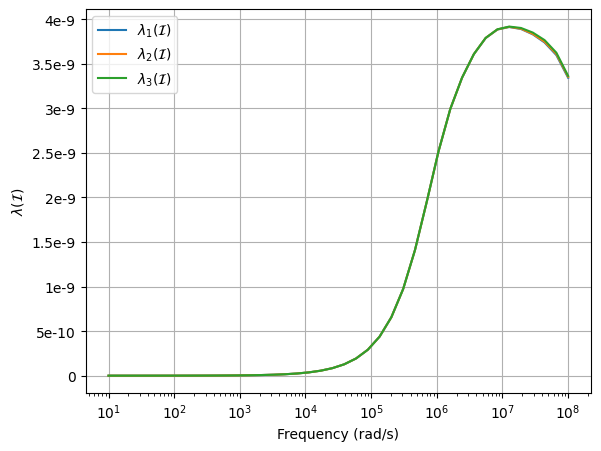

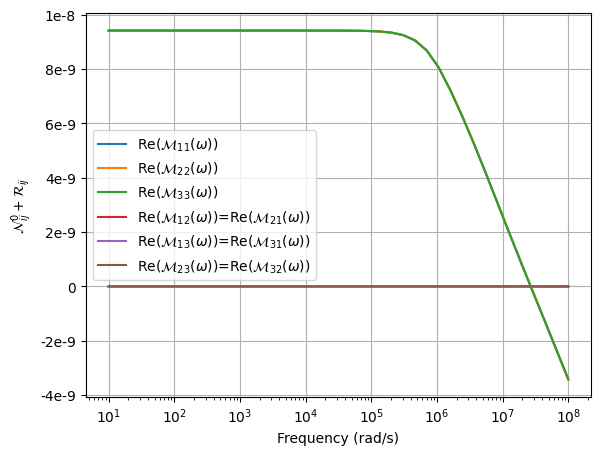

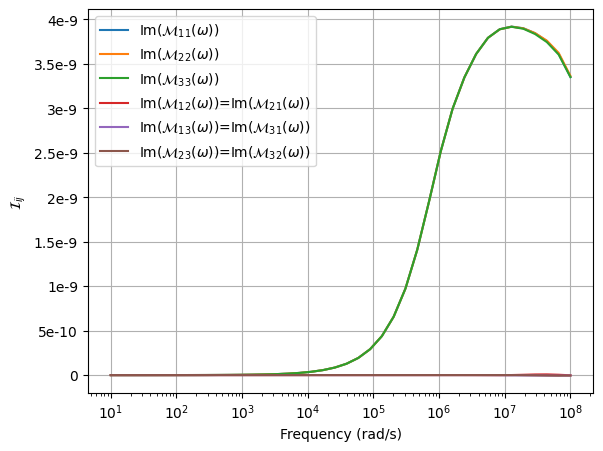

In [6]:
Return_Dict = main()

Standard python dictionary arguments work here, for example, we can query the entries in the output dictionary

In [7]:
Return_Dict.keys()

dict_keys(['TensorArray', 'EigenValues', 'N0', 'NElements', 'FrequencyArray', 'NDOF'])

and query it's content using standard Python dictionary operations. For example entering

In [8]:
Return_Dict['N0']

array([[9.41441108e-09, 5.00258595e-14, 1.69474662e-13],
       [5.00258595e-14, 9.41468477e-09, 1.87046024e-13],
       [1.69474662e-13, 1.87046024e-13, 9.41494025e-09]])

will return the 3x3 array of the coefficients of $\mathcal{N}^0$ for this problem.